In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA/불법주정차프로젝트/mapogu.csv')
df.head(3)

,주소,주차장 종류명,운영구분명,주차현황 정보 제공여부명,총 주차면,유무료구분명,야간무료개방여부명,평일 운영 시작시각(HHMM),평일 운영 종료시각(HHMM),주말 운영 시작시각(HHMM),...,"공휴일 유,무료 구분명",월 정기권 금액,기본 주차 요금,기본 주차 시간(분 단위),추가 단위 요금,추가 단위 시간(분 단위),일 최대 요금,위도,경도,동
0,마포구 망원동 403-2,노외 주차장,시간제 주차장,현재~20분이내 연계데이터 존재(현재 주차대수 표현),148.0,유료,야간 미개방,0,2400,0,...,무료,140000.0,200.0,5.0,0.0,0.0,0.0,37.555585,126.905873,망원동
1,마포구 망원동 394-79,노상 주차장,시간제 주차장,미연계중,1.0,유료,야간 미개방,900,1900,0,...,유료,100000.0,150.0,5.0,150.0,5.0,0.0,37.552368,126.904385,망원동
2,마포구 망원동 394-79,노상 주차장,시간제 주차장,미연계중,1.0,유료,야간 미개방,900,1900,0,...,유료,100000.0,150.0,5.0,150.0,5.0,0.0,37.554920,126.900830,망원동


In [ ]:
df.columns

Index(['주소', '주차장 종류명', '운영구분명', '주차현황 정보 제공여부명', '총 주차면', '유무료구분명',
       '야간무료개방여부명', '평일 운영 시작시각(HHMM)', '평일 운영 종료시각(HHMM)', '주말 운영 시작시각(HHMM)',
       '주말 운영 종료시각(HHMM)', '공휴일 운영 시작시각(HHMM)', '공휴일 운영 종료시각(HHMM)',
       '최종데이터 동기화 시간', '토요일 유,무료 구분명', '공휴일 유,무료 구분명', '월 정기권 금액', '기본 주차 요금',
       '기본 주차 시간(분 단위)', '추가 단위 요금', '추가 단위 시간(분 단위)', '일 최대 요금', '위도', '경도',
       '동'],
      dtype='object')

### 주차시설의 위치가 가격 책정과 이용 가능성에 영향을 미치는가?

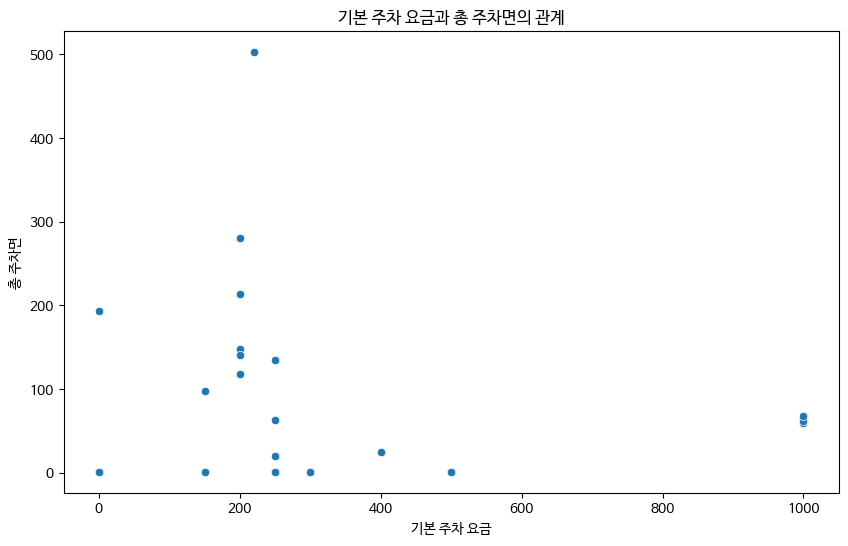


상관계수 :  -0.002778798343774752


In [ ]:
relevant_columns = ['주소', '기본 주차 요금', '총 주차면']
location_pricing_data = df[relevant_columns]

location_pricing_data_clean = location_pricing_data.dropna(subset=['기본 주차 요금'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=location_pricing_data_clean, x='기본 주차 요금',y='총 주차면')
plt.title('기본 주차 요금과 총 주차면의 관계')
plt.xlabel('기본 주차 요금')
plt.ylabel('총 주차면')
plt.show()

correlation = location_pricing_data_clean['기본 주차 요금'].corr(location_pricing_data_clean['총 주차면'])
print('\n상관계수 : ',correlation)

- 상관계수 음수 : 주차 요금과 총 주차면 사이에 관게가 거의 없다. 주차 요금이 주차장의 크기나 이용 가능성에 크게 영향을 미치지 않는 것으로 보인다.

### 주차장의 종류가 사용량과 가격에 미치는 영향이 큰가?

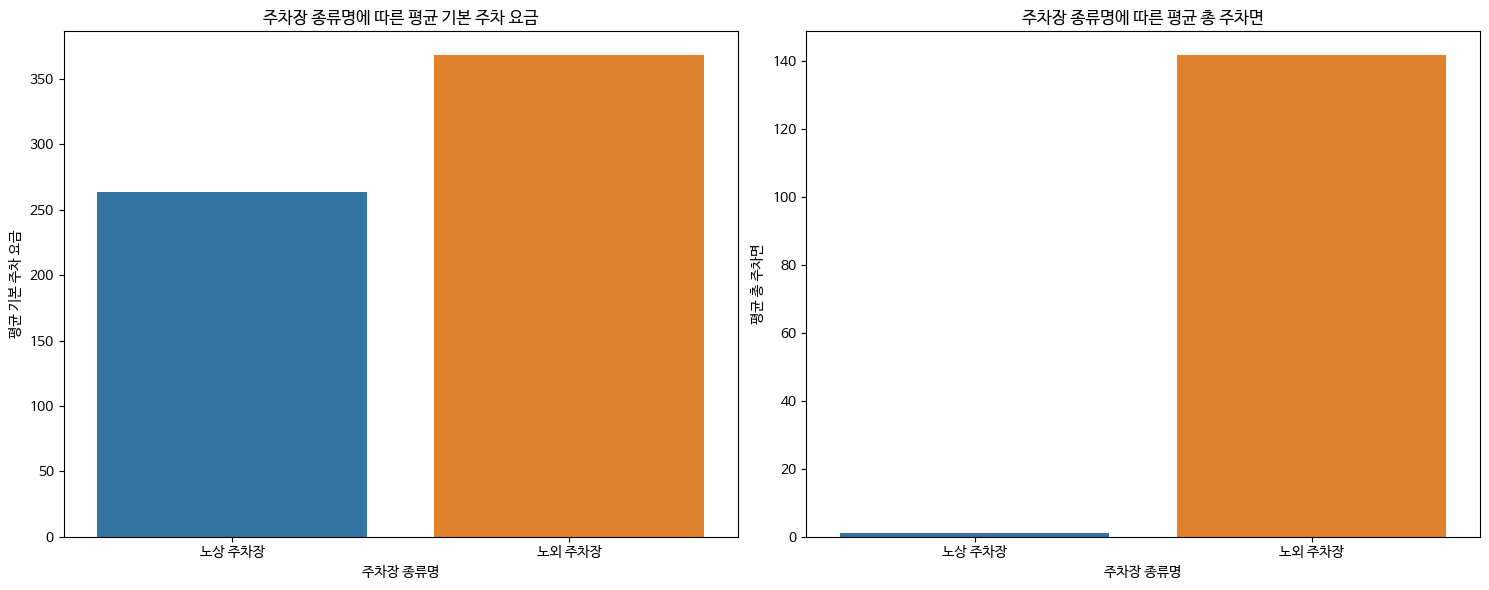

In [ ]:
relevant_columns = ['주차장 종류명','기본 주차 요금','총 주차면']
parking_type = df[relevant_columns]
parking_type_clean = parking_type.dropna(subset=['기본 주차 요금'])
grouped_data = parking_type_clean.groupby('주차장 종류명').mean().reset_index()

fig, axes = plt.subplots(1,2,figsize=(15,6))

sns.barplot(x='주차장 종류명', y='기본 주차 요금', data=grouped_data, ax=axes[0])
axes[0].set_title('주차장 종류명에 따른 평균 기본 주차 요금')
axes[0].set_xlabel('주차장 종류명')
axes[0].set_ylabel('평균 기본 주차 요금')

sns.barplot(x='주차장 종류명', y='총 주차면', data=grouped_data, ax=axes[1])
axes[1].set_title('주차장 종류명에 따른 평균 총 주차면')
axes[1].set_xlabel('주차장 종류명')
axes[1].set_ylabel('평균 총 주차면')

plt.tight_layout()
plt.show()

- 평균 기본 주차 요금 그래프 : 주차 요금이 높은 주차장은 해당 지역의 주차 수요, 위치, 접근성 또는 추가적인 편의 시설이 있을까?
- 평균 총 주차면 그래프 : 주차장의 크기에 대해 수요와 직접적인 관련이 있을 수 있다.

### 평균 기본 요금이 가장 높은 지역은 어디인가?

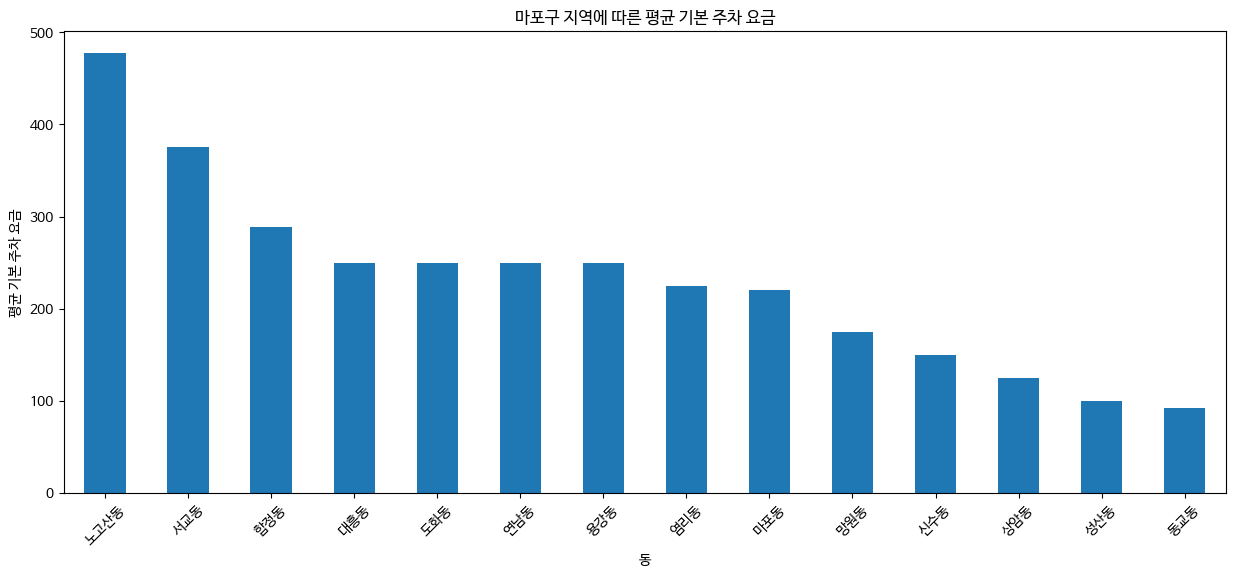

In [ ]:
col = ['주소', '동', '기본 주차 요금']
address_fee_data = df[col]
address_fee_data_clean = address_fee_data.dropna(subset=['기본 주차 요금'])


average_fee_by_dong = address_fee_data_clean.groupby('동')['기본 주차 요금'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
average_fee_by_dong.plot(kind='bar')
plt.title('마포구 지역에 따른 평균 기본 주차 요금')
plt.xlabel('동')
plt.ylabel('평균 기본 주차 요금')
plt.xticks(rotation=45)
plt.show()

### 평균 총 주차면적이 가장 넓은 지역은 어디인가?

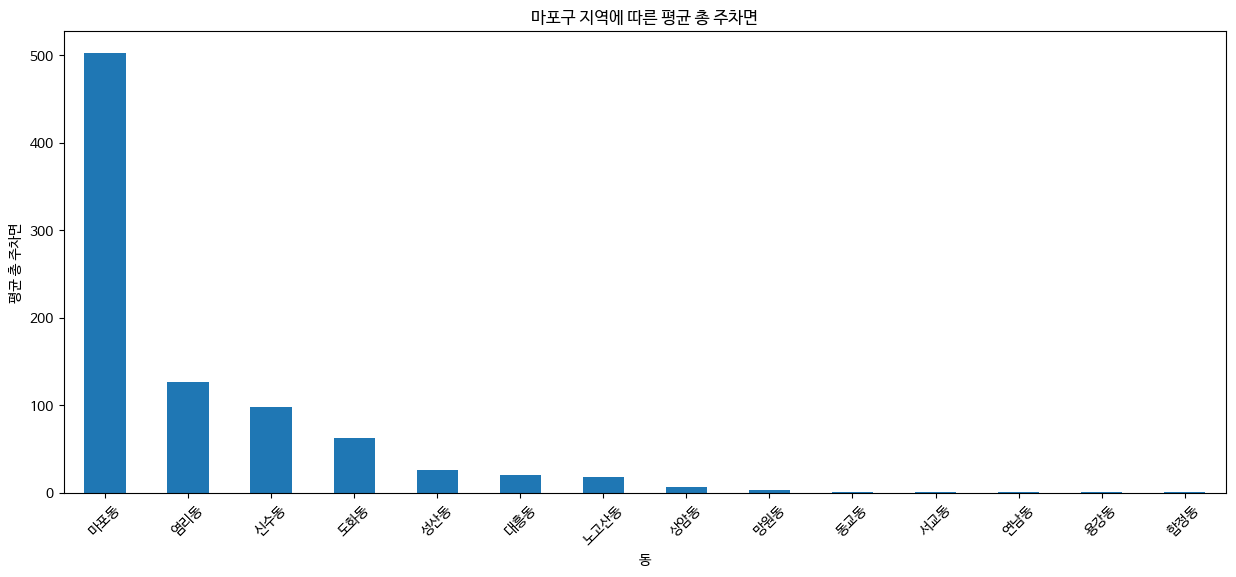

In [ ]:
col = ['주소', '동', '총 주차면']
address_parking_data = df[col]
address_parking_data_clean = address_parking_data.dropna(subset=['총 주차면'])


average_parking_by_dong = address_parking_data_clean.groupby('동')['총 주차면'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
average_parking_by_dong.plot(kind='bar')
plt.title('마포구 지역에 따른 평균 총 주차면')
plt.xlabel('동')
plt.ylabel('평균 총 주차면')
plt.xticks(rotation=45)
plt.show()

### 다양한 운영 유형(시간제,정액제)이 주차장의 점유율에 어떠한 영향을 미치는가?

In [ ]:
df['운영구분명'].unique()

array(['시간제 주차장', '버스전용 주차장', '거주자 우선 주차장', '시간제 + 버스전용 주차장',
       '시간제 + 거주자 주차장'], dtype=object)

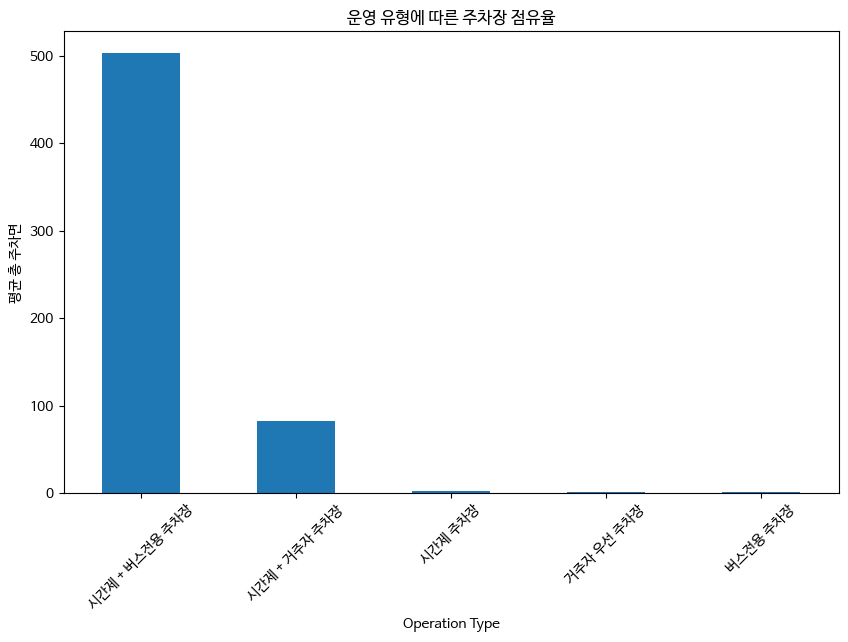

In [ ]:
col = ['운영구분명', '총 주차면']
operation_type_data = df[col]
operation_type_data_clean = operation_type_data.dropna(subset=['총 주차면'])
average_spaces_by_operation = operation_type_data_clean.groupby('운영구분명')['총 주차면'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_spaces_by_operation.plot(kind='bar')
plt.title('운영 유형에 따른 주차장 점유율')
plt.xlabel('Operation Type')
plt.ylabel('평균 총 주차면')
plt.xticks(rotation=45)
plt.show()

- 주차장 운영 유형에 따라 크기와 용량이 다르다는 것을 보여준다. 시간제+버스전용 주차장이 대부분을 차지하는데 이는 버스 사용량과 연관지을 수 있을 것 같다.

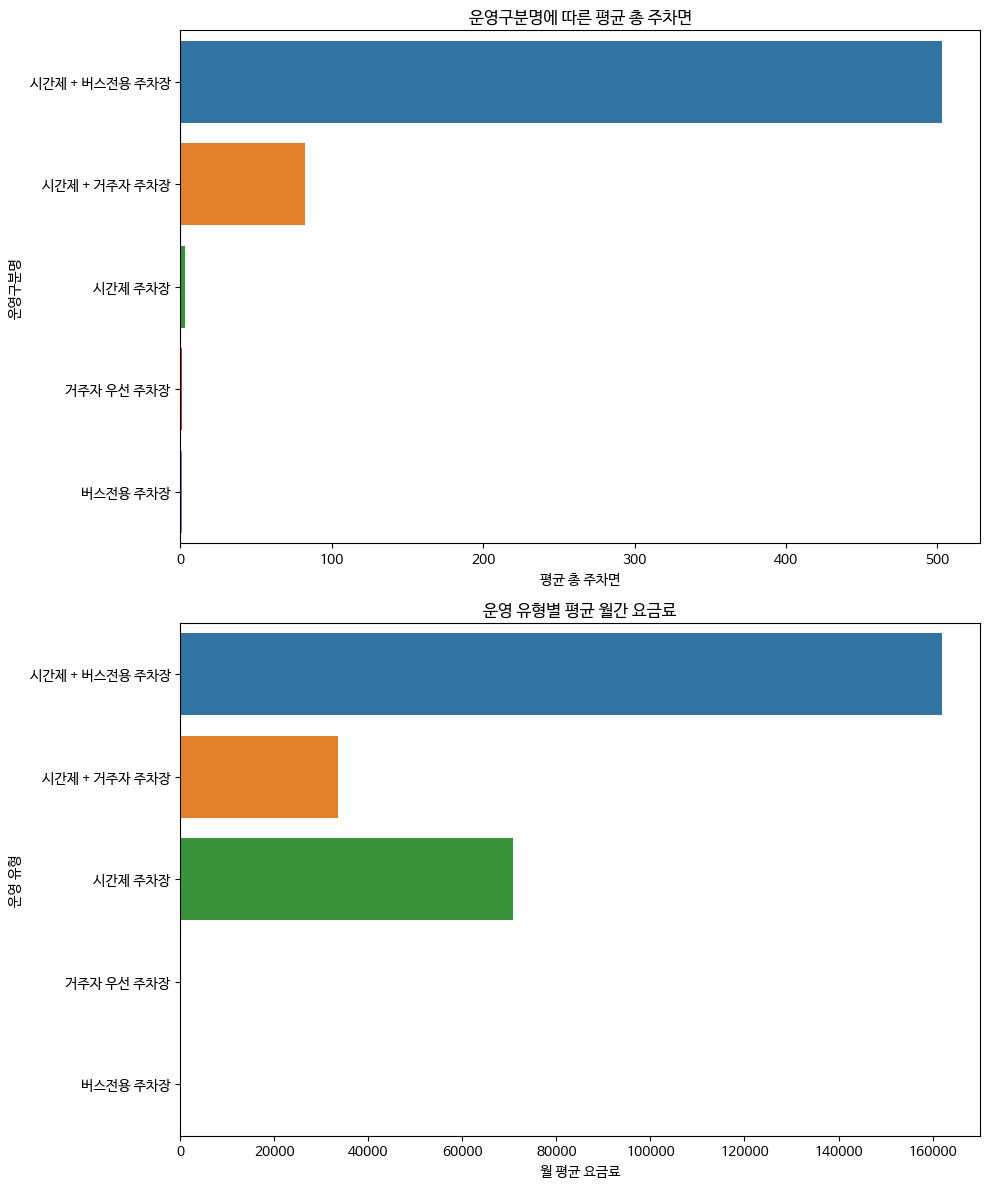

In [ ]:
columns_for_extended_analysis = ['운영구분명', '총 주차면', '월 정기권 금액']
extended_data = df[columns_for_extended_analysis]
extended_data_clean = extended_data.dropna(subset=['총 주차면', '월 정기권 금액'])

grouped_extended_data = extended_data_clean.groupby('운영구분명').agg({
    '총 주차면': 'mean',
    '월 정기권 금액': 'mean'
}).sort_values(by='총 주차면', ascending=False).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(x='총 주차면', y='운영구분명', data=grouped_extended_data, ax=axes[0])
axes[0].set_title('운영구분명에 따른 평균 총 주차면')
axes[0].set_xlabel('평균 총 주차면')
axes[0].set_ylabel('운영구분명')

sns.barplot(x='월 정기권 금액', y='운영구분명', data=grouped_extended_data, ax=axes[1])
axes[1].set_title('운영 유형별 평균 월간 요금료')
axes[1].set_xlabel('월 평균 요금료')
axes[1].set_ylabel('운영 유형')

plt.tight_layout()
plt.show()

- 시간제+버스전용주차장 : 가장 많은 주차 공간 제공, 상대적으로 높은 요금을 가지고 있다. 이는 주차장이 큰 규모와 높은 수요를 반영하고 있음을 나타낸다.
- 시간제+거주자주차장 : 적당한 수의 주차 공간과 중간 정도의 요금을 가지고 있음
- 시간제 주차장 : 적은 주차 공간을 가지고 있으나, 요금은 높은 편. 이는 주차 공간이 제한적이지만, 특정 지역이나 사용자에게 높은 가치를 제공함을 나타냄
- 거주자 우선 주차장 & 버스전용 주차장 : 주차 공간 매우 제한적
- 버스전용주차장은 버스회사에서 운영하거나 나라에서 운여할 확률 높음
- 시간제 주차장만을 보면 외부에서 유입되는 차에 대해 요금을 받는 것을 시사함 (즉, 차를 가지고 마포 지역에 갔을 때, 대부분의 주차장은 요금을 요구함)

### 실시간 주차 정보 제공 여부가 주차장 사용률이나 고객만족도와 연관이 있는가?

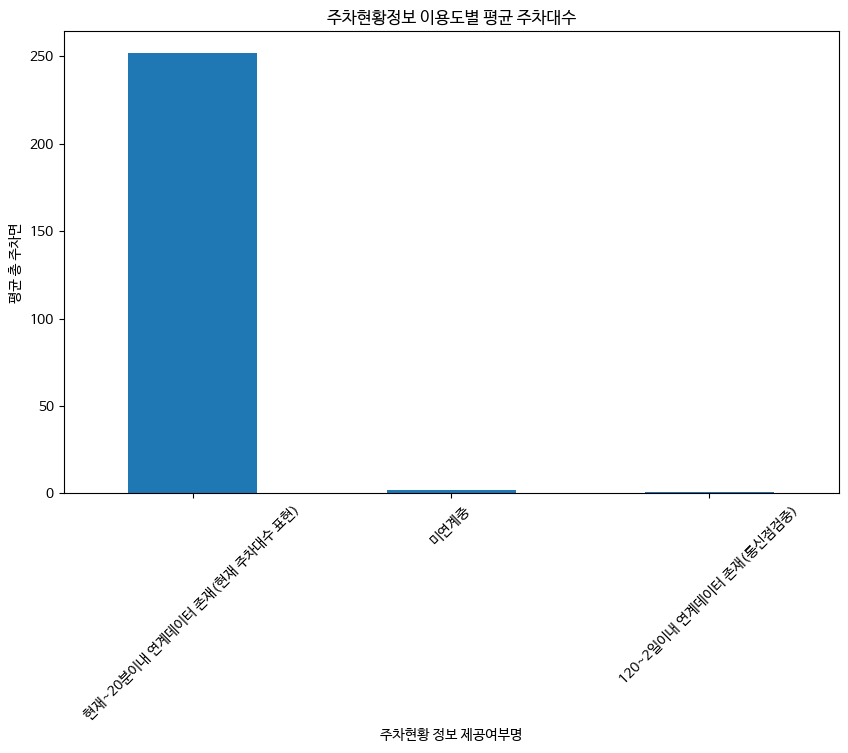

In [ ]:
col = ['주차현황 정보 제공여부명', '총 주차면']
parking_status_data = df[col]

parking_status_data_clean = parking_status_data.dropna(subset=['총 주차면'])
average_spaces_by_status = parking_status_data_clean.groupby('주차현황 정보 제공여부명')['총 주차면'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_spaces_by_status.plot(kind='bar')
plt.title('주차현황정보 이용도별 평균 주차대수')
plt.xlabel('주차현황 정보 제공여부명')
plt.ylabel('평균 총 주차면')
plt.xticks(rotation=45)
plt.show()

- 실시간 주차 정보를 제공하는 주차장이 더 많은 주차 공간을 가지고 있다.
- 이를 잘 활용하면 불법주정차나 주차난에 도움을 줄 수 있지 않을까?

### 주차 시설의 규모가 점유율, 가격에 미치는 영향이 큰가?

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


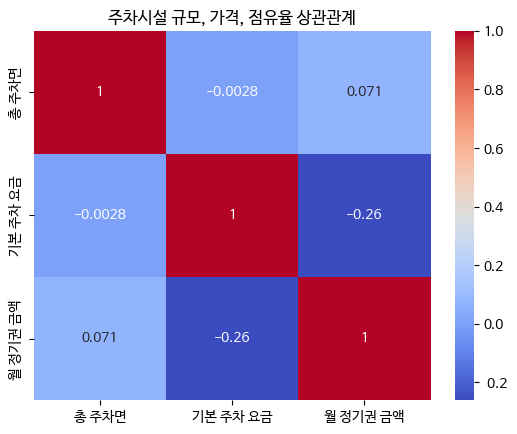

In [ ]:
col = ['총 주차면', '기본 주차 요금', '월 정기권 금액']
scale_data = df[col]
scale_data_clean = scale_data.dropna(subset=['총 주차면', '기본 주차 요금', '월 정기권 금액'])

correlation_matrix = scale_data_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('주차시설 규모, 가격, 점유율 상관관계')
plt.show()

- 총 주차면과 월 정기권 금액은 양의 상관관계가 있는 반면, 기본 주차요금과는 음의 상관관계를 보인다.
- 그러나 값이 작으므로 영향을 미치는 것 같지 않다.
- 기본 주차 요금은 총 주차면과 월 정기권금액과는 상관이 없는 것 같다.

### 유료 주차장과 무료 주차장의 점유율 및 사용 패턴 비교

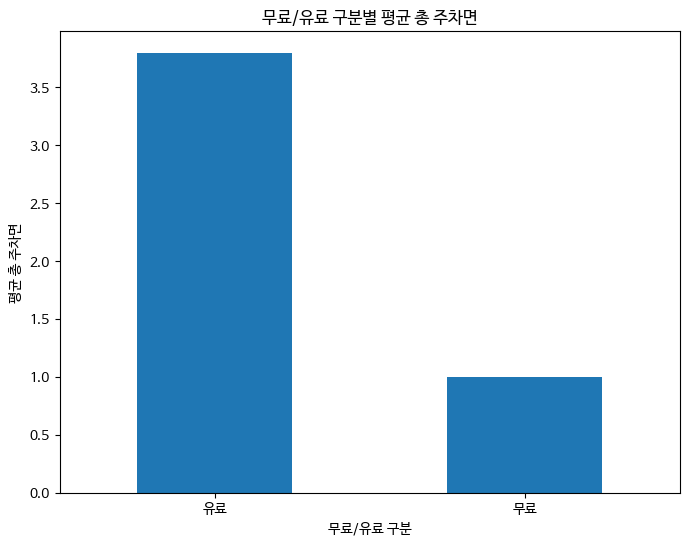

In [ ]:
col = ['유무료구분명', '총 주차면']
free_paid_data = df[col]
free_paid_data_clean = free_paid_data.dropna(subset=['총 주차면'])
average_spaces_by_free_paid = free_paid_data_clean.groupby('유무료구분명')['총 주차면'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
average_spaces_by_free_paid.plot(kind='bar')
plt.title('무료/유료 구분별 평균 총 주차면')
plt.xlabel('무료/유료 구분')
plt.ylabel('평균 총 주차면')
plt.xticks(rotation=0)
plt.show()

- 유료주차장이 무료주차장에 비해 더 많은 주차 공간 제공
- 유료주차장이 더 큰 규모를 가질 수 있으며, 더 많은 수요를 충족시킬 수 있는 능력이 있음을 보여줌
- 주차장의 가격 정책이 주차장의 크기와 사용패턴에 영향을 미칠 수 있음을 보여준다.

### 야간 무료 개방이 주차장 전체 사용에 어떤 영향을 미치는가?

In [ ]:
df['야간무료개방여부명'].unique()

array(['야간 미개방'], dtype=object)

- 데이터 값이 '야간 미개방' 밖에 없어 분석하기에 무리

### 운영시간(평일, 주말, 공휴일)이 주차 공간에 대한 수요에 어떤 영향을 미치는가?

<ipython-input-31-80d293af0dd6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_hours_data['평일 운영 시간'] = operating_hours_data['평일 운영 종료시각(HHMM)'] - operating_hours_data['평일 운영 시작시각(HHMM)'].map(time_to_minutes)
<ipython-input-31-80d293af0dd6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_hours_data['주말 운영 시간'] = operating_hours_data['주말 운영 종료시각(HHMM)'] - operating_hours_data['주말 운영 시작시각(HHMM)'].map(time_to_minutes)
<ipython-input-31-80d293af0dd6>:24: SettingWithCopyWarning: 
A value

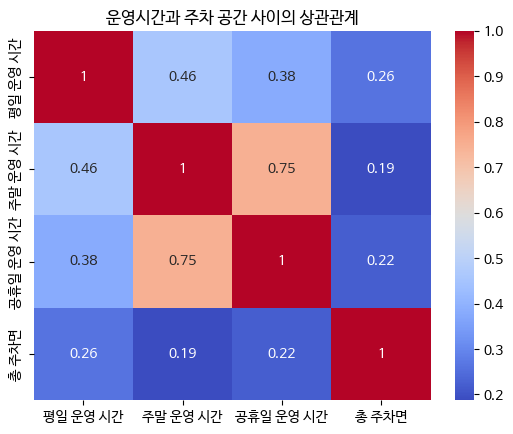

In [ ]:
col = [
    '평일 운영 시작시각(HHMM)', '평일 운영 종료시각(HHMM)',
    '주말 운영 시작시각(HHMM)', '주말 운영 종료시각(HHMM)',
    '공휴일 운영 시작시각(HHMM)', '공휴일 운영 종료시각(HHMM)',
    '총 주차면'
]

def time_to_minutes(time):
    if pd.isnull(time):
        return None
    # 정수를 문자열로 변환
    time_str = str(time)
    # HHMM 형식에 맞게 문자열을 0으로 채움
    time_str = time_str.zfill(4)
    hours = int(time_str[:2])
    minutes = int(time_str[2:])
    return hours * 60 + minutes

operating_hours_data = df[col]

# 운영 시간 계산
operating_hours_data['평일 운영 시간'] = operating_hours_data['평일 운영 종료시각(HHMM)'] - operating_hours_data['평일 운영 시작시각(HHMM)'].map(time_to_minutes)
operating_hours_data['주말 운영 시간'] = operating_hours_data['주말 운영 종료시각(HHMM)'] - operating_hours_data['주말 운영 시작시각(HHMM)'].map(time_to_minutes)
operating_hours_data['공휴일 운영 시간'] = operating_hours_data['공휴일 운영 종료시각(HHMM)'] - operating_hours_data['공휴일 운영 시작시각(HHMM)'].map(time_to_minutes)

operating_hours_data = operating_hours_data[(operating_hours_data['평일 운영 시간']>=0)&(operating_hours_data['주말 운영 시간']>=0)&(operating_hours_data['공휴일 운영 시간']>=0)]

correlation_matrix = operating_hours_data[['평일 운영 시간', '주말 운영 시간', '공휴일 운영 시간', '총 주차면']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('운영시간과 주차 공간 사이의 상관관계')
plt.show()

- 총 주차면에 대해 평일 운영 시간이 가장 많은 연관이 있고 주말 운영 시간이 가장 연관이 적은 것으로 보인다.
- 지역별 주차장 면적 대비 운영시간도 같이 파악해야 할것 같다.
- 회사가 많은 지역인 곳은 평일 주차장 이용율이 높고 오히려 놓기 좋은 지역들(연남, 홍대, 합정 등)은 번잡해서 주차장을 이용 안할 가능성 높음

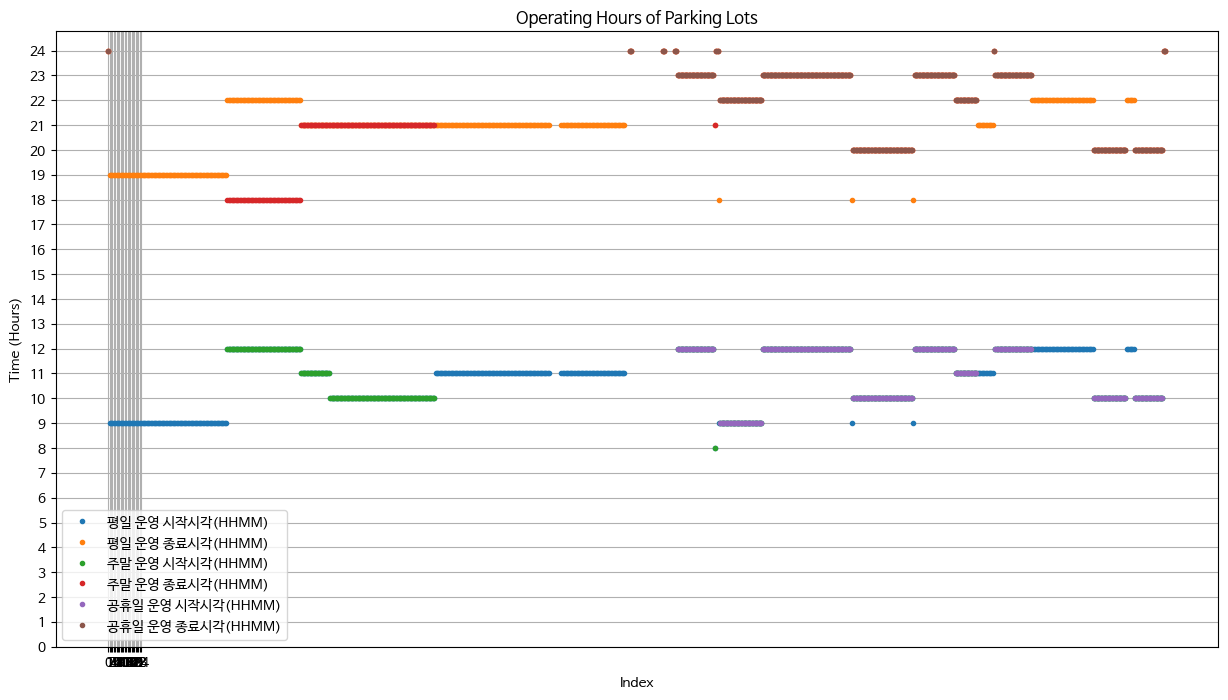

In [ ]:
import numpy as np
time_columns = [
    '평일 운영 시작시각(HHMM)', '평일 운영 종료시각(HHMM)',
    '주말 운영 시작시각(HHMM)', '주말 운영 종료시각(HHMM)',
    '공휴일 운영 시작시각(HHMM)', '공휴일 운영 종료시각(HHMM)'
]

# Function to convert HHMM format to hours
def convert_to_hours(hhmm):
    if pd.isna(hhmm) or hhmm == 0:
        return np.nan
    else:
        hours = int(hhmm / 100)
        minutes = hhmm % 100
        return hours + minutes / 60

# Applying the conversion function to the selected columns
for col in time_columns:
    df[col] = df[col].apply(convert_to_hours)

# Plotting the data
plt.figure(figsize=(15, 8))

for col in time_columns:
    plt.plot(df[col], '.', label=col)

plt.title('Operating Hours of Parking Lots')
plt.xlabel('Index')
plt.ylabel('Time (Hours)')
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 25, 1))
plt.grid(True)
plt.legend()
plt.show()

### 위도, 경도 데이터를 사용한 주차 시설의 공간 분포와 접근성

<Figure size 1200x1200 with 0 Axes>

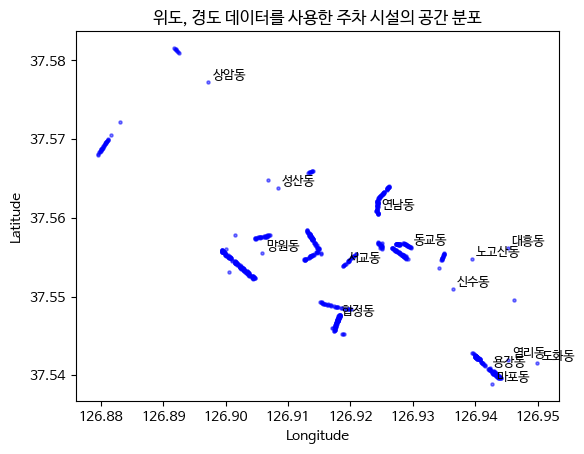

In [ ]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['경도'], df['위도']))
gdf.crs = "EPSG:4326"
mapo_gu_gdf = gdf[df['주소'].str.contains('마포구')]
annotation_gdf = mapo_gu_gdf.groupby('동').apply(lambda x: x.loc[x['총 주차면'].idxmax()])

# Plotting the spatial distribution of all parking facilities with annotations for the largest facility in each neighborhood
plt.figure(figsize=(12, 12))
ax = mapo_gu_gdf.plot(marker='o', color='blue', markersize=5, alpha=0.5)

# Annotating only the largest parking facility in each neighborhood
for idx, row in annotation_gdf.iterrows():
    plt.annotate(text=row['동'], xy=(row['경도'], row['위도']), xytext=(3,3), textcoords="offset points", fontsize=9)

plt.title('위도, 경도 데이터를 사용한 주차 시설의 공간 분포')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 위도, 경도 데이터를 사용한 주차 시설의 개수 분포와 접근성

<ipython-input-40-3268258fae65>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_gdf['geometry'] = centroid_gdf['geometry'].centroid


<Figure size 1200x1200 with 0 Axes>

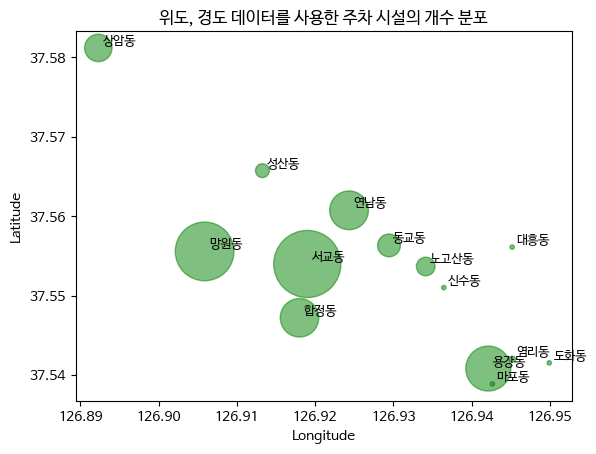

In [ ]:
parking_counts = mapo_gu_gdf.groupby('동').size().reset_index(name='count')
centroid_gdf = mapo_gu_gdf.dissolve(by='동').reset_index()
centroid_gdf['geometry'] = centroid_gdf['geometry'].centroid

merged_gdf = pd.merge(centroid_gdf, parking_counts, on='동')

plt.figure(figsize=(12, 12))
ax = merged_gdf.plot(x='경도', y='위도', kind='scatter', s=merged_gdf['count']*10, alpha=0.5, color='green')

for idx, row in merged_gdf.iterrows():
    plt.annotate(text=row['동'], xy=(row['경도'], row['위도']), xytext=(3,3), textcoords="offset points", fontsize=9)

plt.title('위도, 경도 데이터를 사용한 주차 시설의 개수 분포')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
